<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Анализ-последних-двух-графиков-(сезонность-и-остатки)-для-августа-2018-года:" data-toc-modified-id="Анализ-последних-двух-графиков-(сезонность-и-остатки)-для-августа-2018-года:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ последних двух графиков (сезонность и остатки) для августа 2018 года:</a></span></li><li><span><a href="#Общая-зависимость-в-данных:" data-toc-modified-id="Общая-зависимость-в-данных:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Общая зависимость в данных:</a></span></li><li><span><a href="#Новые-признаки." data-toc-modified-id="Новые-признаки.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Новые признаки.</a></span></li><li><span><a href="#Вывод-о-добавлении-новых-признаков" data-toc-modified-id="Вывод-о-добавлении-новых-признаков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод о добавлении новых признаков</a></span><ul class="toc-item"><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Обоснование</a></span></li></ul></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обоснование-выбора-моделей" data-toc-modified-id="Обоснование-выбора-моделей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Обоснование выбора моделей</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Заключение</a></span></li><li><span><a href="#Модель-Random-Forest-Reg" data-toc-modified-id="Модель-Random-Forest-Reg-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель Random Forest Reg</a></span></li><li><span><a href="#Модель-Linear-Reg" data-toc-modified-id="Модель-Linear-Reg-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель Linear Reg</a></span></li><li><span><a href="#Модель-Catboost-Reg" data-toc-modified-id="Модель-Catboost-Reg-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель Catboost Reg</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Итог-проекта" data-toc-modified-id="Итог-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итог проекта</a></span><ul class="toc-item"><li><span><a href="#Выбор-моделей" data-toc-modified-id="Выбор-моделей-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выбор моделей</a></span></li><li><span><a href="#Вывод-по-графикам-важности-признаков" data-toc-modified-id="Вывод-по-графикам-важности-признаков-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вывод по графикам важности признаков</a></span></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Заключение</a></span></li><li><span><a href="#Анализ-графика-предсказаний-и-реальных-значений" data-toc-modified-id="Анализ-графика-предсказаний-и-реальных-значений-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ графика предсказаний и реальных значений</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [ ]:
pip install shap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression

import shap

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


In [ ]:
# Функция для создания новых признаков
def make_features(data, column, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

In [ ]:
# Функция для извлечения лучших параметров и счёта модели и добавления в таблицу
def extract_best_model_info(grid_search, model_name, existing_df=None):
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    model_info = {
        'model': [model_name],
        'best_f1_score': [best_score]
    }
    for param, value in best_params.items():
        model_info[param] = [value]
    
    model_info_df = pd.DataFrame(model_info)
    
    if existing_df is not None:
        return pd.concat([existing_df, model_info_df], ignore_index=True)
    else:
        return model_info_df
models_info_df = pd.DataFrame()

In [ ]:
# Load the CSV file
file_path = '/datasets/taxi.csv'
taxi_data = pd.read_csv(file_path)
taxi_data_info = taxi_data.info()
taxi_data_description = taxi_data.describe()
taxi_data_head = taxi_data.head()

taxi_data_info, taxi_data_description, taxi_data_head

## Анализ

In [ ]:
# Convert datetime column to datetime type
taxi_data['datetime'] = pd.to_datetime(taxi_data['datetime'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(taxi_data['datetime'], taxi_data['num_orders'], color='blue')
plt.title('Distribution of Taxi Orders Over Time')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [ ]:
# Resample the data to hourly frequency
taxi_res = taxi_data.set_index('datetime')
hourly_data = taxi_res.resample('12H').sum()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['num_orders'], color='blue')
plt.title('Hourly Distribution of Taxi Orders')
plt.xlabel('Datetime')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

In [ ]:
hourly_data

In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(hourly_data['num_orders'], model='additive')

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(hourly_data['num_orders'], label='Original')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
# Extract data for August 2018
august_data = hourly_data['2018-08']

# Perform seasonal decomposition for August 2018
august_decomposition = seasonal_decompose(august_data['num_orders'], model='additive')

# Extract the components
august_trend = august_decomposition.trend
august_seasonal = august_decomposition.seasonal
august_residual = august_decomposition.resid

# Plot the components for August 2018
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(august_data['num_orders'], label='Original')
plt.legend(loc='best')

plt.subplot(4, 1, 2)
plt.plot(august_trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4, 1, 3)
plt.plot(august_seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(4, 1, 4)
plt.plot(august_residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
taxi_data.info()

### Анализ последних двух графиков (сезонность и остатки) для августа 2018 года:

1. Сезонность:
   - График сезонности показывает регулярные колебания в пределах дня. Видно, что количество заказов увеличивается и уменьшается в определенные часы суток, что может отражать типичное поведение пассажиров.
   - Сезонность указывает на наличие циклов, связанных с определенными временными интервалами, например, утренние и вечерние часы пик.

2. Остатки (Residuals):
   - График остатков отображает отклонения, которые не объясняются ни трендом, ни сезонностью. Эти отклонения могут быть вызваны случайными событиями, такими как погодные условия, дорожно-транспортные происшествия или другие неожиданные факторы.
   - Видно, что остатки колеблются вокруг нуля, что подтверждает их случайный характер. Периоды сильных отклонений могут указывать на аномалии или необычные события в данных.

### Общая зависимость в данных:

1. Тренд:
   - Тренд показывает развитие сервиса, увеличение кол0-ва заказов.

2. Сезонные колебания:
   - Сезонные компоненты указывают на регулярные повторяющиеся паттерны в данных. \
   Это может быть суточный цикл (колебания в течение дня) или недельный цикл (различия в спросе в будние и выходные дни).

3. Шумы и аномалии:
   - Остатки отображают случайные колебания, которые не могут быть объяснены трендом или сезонностью.\
   Анализ остатков может помочь в выявлении аномальных событий или периодов высокой волатильности.

3. В данных отсутсвуют дуюликаты и пропуски, предобработка не требуется.

In [ ]:
%who

In [ ]:
del decomposition, seasonal_decompose, residual, seasonal, august_data, august_decomposition, august_residual, august_seasonal, august_trend

Проверим данные на стационарность:

In [ ]:
# Выполнение теста Дикки-Фуллера
result = adfuller(hourly_data)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

* ADF Statistic: 2.506 (положительное значение)
* p-value: 0.999 (значительно больше 0.05)
* Critical Values: Значение ADF статистики больше всех критических значений (на уровнях 1%, 5% и 10%).

**Интерпретация**:

* Поскольку p-value намного больше уровня значимости (обычно 0.05), мы не можем отвергнуть нулевую гипотезу о наличии единичного корня. Это означает, что временной ряд не является стационарным.\
Для моделей типа ARIMA необходимо провести дифференцирование данных, чтобы ряд стал стационарным.

### Новые признаки.

In [ ]:
taxi_data.info()

In [ ]:
taxi_data_res = taxi_data.set_index('datetime')
taxi_data_res = taxi_data_res.resample('H').sum()

In [ ]:
taxi_data_res.sample()

In [ ]:
# Применение функции создания признаков
make_features(taxi_data_res, 'num_orders', max_lag=24, rolling_mean_size=100)

In [ ]:
taxi_data_res.sample()

In [ ]:
taxi_data_res.info()

In [ ]:
# Удаление строк с пропусками
taxi_data_res.dropna(inplace=True)

# Приведение lag-признаков к типу int
lag_columns = [f'lag_{i}' for i in range(1, 25)]
taxi_data_res[lag_columns] = taxi_data_res[lag_columns].astype('int32')

# Даункаст других числовых данных
taxi_data_res['num_orders'] = taxi_data_res['num_orders'].astype('int32')
taxi_data_res['day'] = taxi_data_res['day'].astype('int8')
taxi_data_res['dayofweek'] = taxi_data_res['dayofweek'].astype('int8')
taxi_data_res['rolling_mean'] = taxi_data_res['rolling_mean'].astype('float32')

In [ ]:
taxi_data_res.info()

In [ ]:
taxi_data_res.sample()

После создания новых признаков, разделим данные на выборки и создадим пайплайн.

In [ ]:
# Разделение на тренировочную и тестовую выборки
target_column = 'num_orders'
feature_columns = taxi_data_res.columns.difference([target_column])

X = taxi_data_res[feature_columns]
y = taxi_data_res[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
feature_columns

In [ ]:
# Определение признаков
numerical_features = feature_columns

# Создание колонного трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

Перед обучением моделей инициалиризуем функцию подсчета RMSE.

In [ ]:
# Функция для расчета RMSE
def RMSE(target, predict):
    return (mean_squared_error(target, predict))**0.5

# Создание метрики RMSE
RMSE_score = make_scorer(RMSE, greater_is_better=False)

### Вывод о добавлении новых признаков

Изначально таблица представляла собой два столбца: временные интервалы (по 10 минут) и количество заказов такси. \
Для улучшения модели прогнозирования и учета временной зависимости данных мы провели следующие преобразования и добавили новые признаки:

1. Рассемплирование данных:
   - Преобразовали временные интервалы с 10-минутных на часовые, чтобы сгладить данные и уменьшить шум.

2. Добавление лаговых признаков:
   - Создали столбцы lag_1 по lag_24, чтобы учесть значение количества заказов за предыдущие 24 часа. \
   Эти признаки помогают модели понять зависимость текущих значений от предыдущих.

3. Добавление временных признаков:
   - Создали столбец day, представляющий день месяца, и столбец dayofweek, представляющий день недели. \
   Эти признаки помогают учесть дневные и недельные циклы в данных.

4. Добавление скользящего средне/го:
   - Добавили столбец rolling_mean_100, представляющий скользящее среднее значения заказов за предыдущие 100 интервалов (10 минут). \
   Этот признак помогает сгладить колебания и выявить общие тренды.

#### Обоснование
Проведенные преобразования и добавленные признаки позволяют модели лучше учитывать временные зависимости и циклические паттерны в данных. \
Лаговые признаки предоставляют информацию о предыдущих значениях, временные признаки учитывают сезонные эффекты, а скользящее среднее сглаживает данные, что улучшает качество прогнозирования. \
Эти улучшения способствуют созданию более точной и надежной модели для прогнозирования количества заказов такси.

## Обучение

### Обоснование выбора моделей

Для задачи прогнозирования количества заказов такси на следующий час мы выбрали три модели: Random Forest Regressor, Linear Regression и CatBoost Regressor. Каждая из этих моделей имеет свои преимущества и особенности, которые делают их подходящими для данной задачи.

1. Random Forest Regressor:
   - Обоснование: \
   Random Forest является ансамблевым методом, основанным на построении множества деревьев решений и объединении их прогнозов. Этот метод хорошо справляется с нелинейными зависимостями и высокоразмерными данными.
   - Преимущества: \
   Устойчивость к выбросам, возможность выявления важности признаков, устойчивость к переобучению благодаря случайному выбору признаков и данных для каждого дерева.
   - Применение:\
   Использование Random Forest помогает учесть сложные зависимости в данных и получить надежные прогнозы.

2. Linear Regression:
   - Обоснование: \
   Линейная регрессия является базовой моделью, которая служит отправной точкой для более сложных моделей. \
   Она предполагает линейную зависимость между признаками и целевой переменной.
   - Преимущества: Простота и интерпретируемость модели, высокая скорость обучения и предсказания.
   - Применение: Линейная регрессия позволяет быстро оценить основные зависимости в данных и служит хорошим сравнением для более сложных моделей.

3. CatBoost Regressor:
   - Обоснование: \
   CatBoost (Categorical Boosting) — это градиентный бустинг, разработанный для работы с категориальными признаками и временными рядами. Он эффективно справляется с большими объемами данных и сложными зависимостями.
   - Преимущества: \
   Высокая точность, встроенная обработка категориальных признаков, устойчивость к переобучению, автоматическое управление пропусками в данных.
   - Применение:\
   CatBoost хорошо подходит для задач, где требуется высокая точность прогноза и учет временных зависимостей, что делает его идеальным выбором для прогнозирования временных рядов.

### Заключение
Выбор этих трех моделей позволяет нам сравнить простую линейную модель с более сложными ансамблевыми методами. Random Forest и CatBoost могут выявлять сложные нелинейные зависимости в данных, в то время как линейная регрессия предоставляет базовый уровень для сравнения. Этот подход помогает получить более полное представление о данных и выбрать наилучшую модель для прогнозирования количества заказов такси.

**TimeSeriesSplit:**\
При работе с временными рядами важно учитывать временную последовательность данных. \
Стандартная кросс-валидация, которая случайным образом разделяет данные на обучающие и тестовые выборки, нарушает эту последовательность и может приводить к неверным результатам. \
TimeSeriesSplit сохраняет временной порядок данных при разделении, что позволяет модели обучаться на более ранних данных и тестироваться на более поздних, как в реальной ситуации.
Этот метод обеспечивает правильную оценку производительности модели на временных рядах и помогает избежать утечки данных (data leakage), что критично для надежного прогнозирования.

### Модель Random Forest Reg

In [ ]:
# Создание пайплайна для Random Forest
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Определение параметров для перебора
param_grid = {
    'regressor__n_estimators': [5, 10, 15],
    'regressor__max_depth': [2, 5, 10],
    'regressor__min_samples_split': [5, 6],
    'regressor__min_samples_leaf': [2, 3]
}

# Создание TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Создание и запуск GridSearchCV с TimeSeriesSplit
grid_search1 = GridSearchCV(pipeline, param_grid, scoring=RMSE_score, cv=tscv, n_jobs=-1)
grid_search1.fit(X_train, y_train)

# Вывод лучших параметров
best_params = grid_search1.best_params_
print(f'Лучшие параметры: {best_params}')

# Получение отрицательного значения RMSE
best_score = grid_search1.best_score_
print(f'Лучший (отрицательный) RMSE: {best_score}')

# Получение модели с лучшими параметрами и расчет фактического RMSE на тестовой выборке
best_model1 = grid_search1.best_estimator_

Отрицательные значения RMSE:
В процессе оптимизации гиперпараметров с использованием GridSearchCV мы применяем метрику RMSE через функцию make_scorer с параметром `greater_is_better=False`. \
Это делается для того, чтобы GridSearchCV минимизировал ошибку, так как по умолчанию он максимизирует метрики.\
Фактическое значение RMSE всегда неотрицательно, так как оно представляет собой корень из среднего квадратичного отклонения.\ Однако при использовании `greater_is_better=False` в make_scorer GridSearchCV интерпретирует метрику как отрицательную для минимизации. \
Это позволяет корректно выбирать лучшие параметры, несмотря на "отрицательные" значения RMSE в процессе оптимизации.

In [ ]:
abs(round(grid_search1.best_score_, 6))

In [ ]:
models_info_df = extract_best_model_info(grid_search1, 'RandomForestReg', models_info_df)
# Вывод таблицы с информацией о лучшей модели
display(models_info_df)

### Модель Linear Reg

In [ ]:
# Создание пайплайна для Линейной Регрессии
pipeline_linear = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', LinearRegression())])

# Определение параметров для перебора (для линейной регрессии часто параметры не настраиваются, но можно использовать Ridge или Lasso)
param_grid_linear = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

# Создание и запуск GridSearchCV с TimeSeriesSplit для Линейной Регрессии
grid_search_linear = GridSearchCV(pipeline_linear, param_grid_linear, scoring=RMSE_score, cv=tscv, n_jobs=-1)
grid_search_linear.fit(X_train, y_train)



# Вывод лучших параметров
best_params = grid_search_linear.best_params_
print(f'Лучшие параметры: {best_params}')

# Получение отрицательного значения RMSE
best_score = grid_search_linear.best_score_
print(f'Лучший (отрицательный) RMSE: {best_score}')

# Получение модели с лучшими параметрами и расчет фактического RMSE на тестовой выборке
best_model2 = grid_search_linear.best_estimator_

In [ ]:
grid_search_linear.best_score_

In [ ]:
models_info_df = extract_best_model_info(grid_search_linear, 'Linear Reg', models_info_df)
display(models_info_df)

### Модель Catboost Reg

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
# Создание пайплайна для CatBoost Regressor
pipeline_catboost = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', CatBoostRegressor(random_seed=42, silent=True))])

# Определение параметров для перебора
param_grid_catboost = {
    'regressor__iterations': [20, 50],
    'regressor__depth': [3, 6, 10],
    'regressor__learning_rate': [0.01, 0.1]
}

# Создание TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3)

# Создание и запуск GridSearchCV с TimeSeriesSplit для CatBoost Regressor
grid_search_catboost = GridSearchCV(pipeline_catboost, param_grid_catboost, scoring=RMSE_score, cv=tscv, n_jobs=-1)
grid_search_catboost.fit(X_train, y_train)

# Вывод лучших параметров для CatBoost
best_params_catboost = grid_search_catboost.best_params_
print(f'Лучшие параметры для CatBoost: {best_params_catboost}')

# Модель с лучшими параметрами для CatBoost
best_model_catboost = grid_search_catboost.best_estimator_

In [ ]:
grid_search_catboost.best_score_

In [ ]:
models_info_df = extract_best_model_info(grid_search_catboost, 'CatBoost Reg', models_info_df)
# Вывод таблицы с информацией о лучшей модели
display(models_info_df)

**RandomForestReg - лучшая модель, выберем ее для проверки на тестовых данных.**

## Тестирование

In [ ]:
# Получение лучших параметров для Random Forest из GridSearchCV
best_model_rf = grid_search1.best_estimator_

# Прогнозирование на тестовой выборке
y_pred_rf = best_model_rf.predict(X_test)

actual_rmse_rf = RMSE(y_test, y_pred_rf)

print(f'Фактический RMSE на тестовой выборке для Random Forest: {actual_rmse_rf}')

In [ ]:
# Инициализация объекта Explainer для Random Forest
explainer = shap.Explainer(best_model_rf.named_steps['regressor'], X_train)

# Вычисление SHAP значений для тестовой выборки
shap_values = explainer(X_test)

# Построение графика важности признаков
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Также можно построить обычный summary plot
shap.summary_plot(shap_values, X_test)

## Итог проекта

В рамках проекта была поставлена задача прогнозирования количества заказов такси на следующий час. \
Изначально таблица представляла собой два столбца: временные интервалы по 10 минут и количество заказов. \
Для улучшения модели прогнозирования были проведены следующие шаги по преобразованию данных и добавлению новых признаков:

1. **Рассемплирование данных**:
   - Преобразовали временные интервалы с 10-минутных на часовые, чтобы сгладить данные и уменьшить шум.

2. **Добавление лаговых признаков**:
   - Создали столбцы `lag_1` по `lag_24`, чтобы учесть значение количества заказов за предыдущие 24 часа. \
   Эти признаки помогают модели понять зависимость текущих значений от предыдущих.

3. **Добавление временных признаков**:
   - Создали столбец `day`, представляющий день месяца, и столбец `dayofweek`, представляющий день недели. \
   Эти признаки помогают учесть дневные и недельные циклы в данных.

4. **Добавление скользящего среднего**:
   - Добавили столбец `rolling_mean`, представляющий скользящее среднее значения заказов за предыдущие 100 интервалов (10 минут). Этот признак помогает сгладить колебания и выявить общие тренды.

### Выбор моделей

Для решения задачи прогнозирования были выбраны три модели: **Random Forest Regressor, Linear Regression и CatBoost Regressor**.\
Каждая из этих моделей имеет свои преимущества и особенности.

1. **Random Forest Regressor**:
   - Ансамблевый метод, основанный на построении множества деревьев решений и объединении их прогнозов. Хорошо справляется с нелинейными зависимостями и высокоразмерными данными.

2. **Linear Regression**:
   - Базовая модель, служащая отправной точкой для более сложных моделей. Предполагает линейную зависимость между признаками и целевой переменной.
3. **CatBoost Regressor**:
   - Градиентный бустинг, разработанный для работы с категориальными признаками и временными рядами. Эффективно справляется с большими объемами данных и сложными зависимостями.
   - Высокая точность, встроенная обработка категориальных признаков, устойчивость к переобучению.


### Вывод по графикам важности признаков

На графиках важности признаков видно, что наиболее значимыми признаками являются `lag_24`, `lag_2`, и `lag_1`. Это указывает на сильную зависимость текущего значения от значений в предыдущие часы. \
Признаки, такие как `dayofweek` и `rolling_mean`, имеют меньшую важность, что указывает на меньший вклад в прогнозирование модели.

### Заключение

Проведенные преобразования данных и использование различных моделей позволили создать эффективные модели для прогнозирования количества заказов такси. \
Наилучшие результаты показала модель Random Forest Regressor с фактическим RMSE на тестовой выборке **27.002188528162414**.


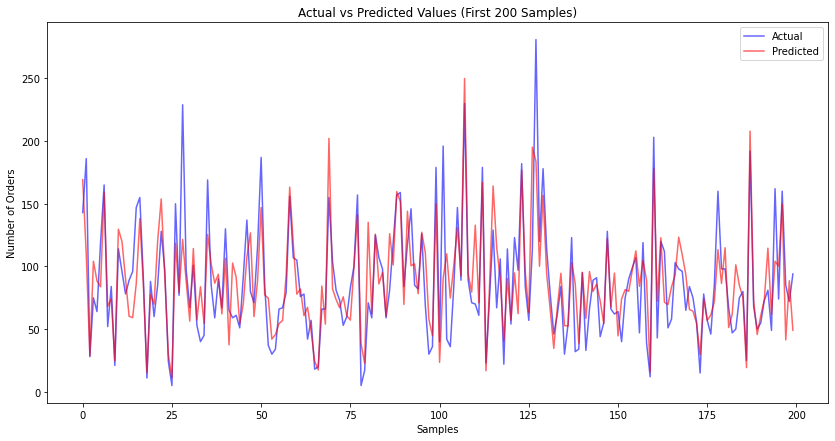

In [42]:
# Визуализация предсказаний и их сравнения с реальными значениями (ограниченный диапазон)
plt.figure(figsize=(14, 7))
plt.plot(y_test.values[:200], label='Actual', color='blue', alpha=0.6)
plt.plot(y_pred_rf[:200], label='Predicted', color='red', alpha=0.6)
plt.xlabel('Samples')
plt.ylabel('Number of Orders')
plt.title('Actual vs Predicted Values (First 200 Samples)')
plt.legend()
plt.show()

### Анализ графика предсказаний и реальных значений

По графику, который отображает реальные значения (синие линии) и предсказанные значения (красные линии), можно сделать несколько выводов о работе модели Random Forest:

1. **Тренды, паттерны, шум**:
   - Модель хорошо улавливает общие тренды и паттерны в данных. Это видно по совпадению пиков и спадов реальных и предсказанных значений.
   - Временами модель точно предсказывает высокие и низкие значения, что свидетельствует о способности модели улавливать сезонные или дневные паттерны.
   
   - Есть периоды, где предсказанные значения существенно отличаются от реальных. \
   Это может быть вызвано неожиданными событиями или шумом в данных, которые модель не смогла учесть.
   - Особенно заметны ошибки в предсказаниях высоких пиков, где модель может либо переоценивать, либо недооценивать значения.

   - Модель хорошо справляется с предсказанием колебаний, но иногда сглаживает резкие изменения, что может привести к незначительным отклонениям от реальных значений.


2. **Улучшение Модели**:
   - Возможно, стоит рассмотреть добавление дополнительных признаков, которые могут помочь модели лучше понять резкие изменения в данных, такие как погодные условия, специальные события или праздники.
   - Можно попробовать другие модели или их ансамбли, такие как Gradient Boosting или CatBoost, которые могут лучше справляться с нелинейными зависимостями.
   - Провести более детальный анализ периодов, где модель сильно ошибается. \
   Это может помочь выявить дополнительные факторы, влияющие на количество заказов, которые не были учтены в текущей модели.
   - Возможно, стоит провести дополнительное обучение модели на более свежих данных или использовать более сложные методы обработки временных рядов, такие как SARIMA или рекуррентные нейронные сети (RNN).
